#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

*To explore numeric data, I would want to look at the distributions of the data. To do this, I can make histograms/density plots to see if the data is normal if it is a bell curve shape. I can also look at summary stats, such as min/median/mean/max to see if there are outliers, and to see if the median is close to the mean, which will tell me if it is normal or not as well.
To explore categorical data, I would want to look at bar plots with the x-axis being the categories and the y-axis being the counts of each in each category.
To explore the relationship between categorical and numeric data, I can make box plots to see the distribution of the numeric variable within the groups of the categorical variable.*

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [34]:
# Used AI (Chat GPT) to help get code to generate the fake data

# Your code here
import pandas as pd
import numpy as np

np.random.seed(9062025)

# number of rows
n = 1000

# numeric columns
num1 = np.random.normal(loc=50, scale=10, size=n)   # normal distribution
num2 = np.random.randint(0, 100, size=n)            # integers between 0–99

# categorical column with 10 categories
categories = [f"Category_{i}" for i in range(1, 11)]
cat = np.random.choice(categories, size=n)

# create DataFrame
df = pd.DataFrame({
    "num1": num1,
    "num2": num2,
    "category": cat
})

df.head()

,num1,num2,category
0,53.298288,83,Category_3
1,52.633736,94,Category_1
2,50.614319,76,Category_7
3,34.374524,59,Category_3
4,71.595693,48,Category_7


count    1000.000000
mean       49.865654
std         9.767090
min        21.496570
25%        43.492958
50%        50.001715
75%        56.372548
max        82.793212
Name: num1, dtype: float64

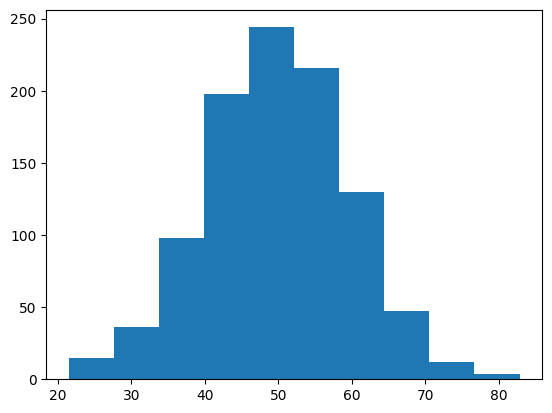

In [35]:
# Your code here
# Histogram of num1
import matplotlib.pyplot as plt

# Looks to be a normal distribution
plt.hist(df.num1)
df.num1.describe()


count    1000.000000
mean       50.912000
std        29.042033
min         0.000000
25%        26.000000
50%        51.000000
75%        77.000000
max        99.000000
Name: num2, dtype: float64

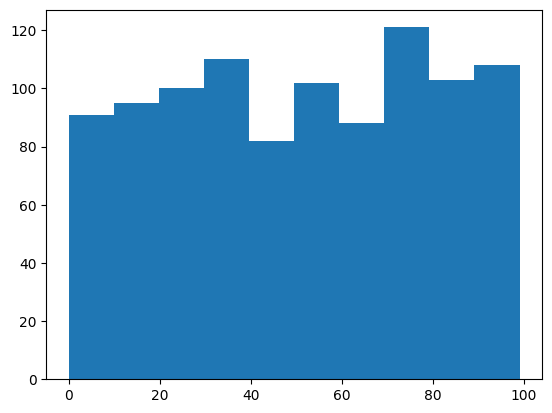

In [36]:
# Your code here
# histogram for num2
# not a normal distribution
plt.hist(df.num2)
df.num2.describe()

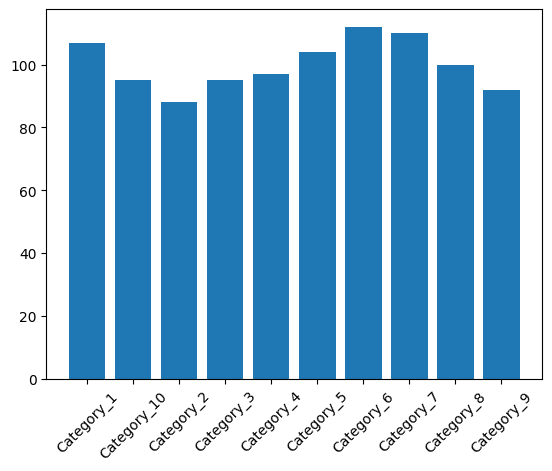

In [37]:
# Your code here
# bar chart for categorical variable
# get the counts for each category
counts = df['category'].value_counts().sort_index()

# not every category has the same counts
plt.bar(counts.index, counts)
plt.xticks(rotation=45)
plt.show()

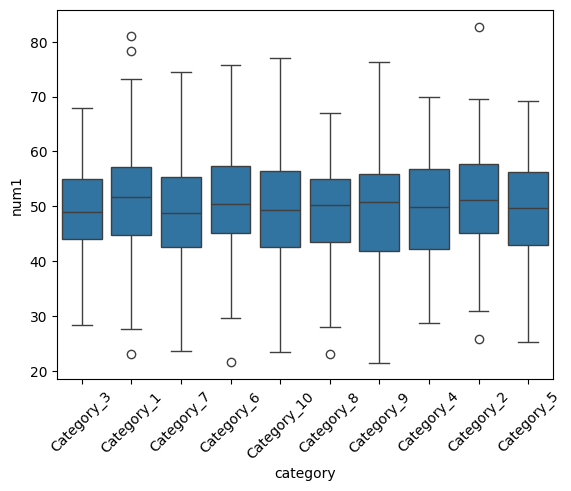

In [38]:
# Your code here
import seaborn as sns

sns.boxplot(data = df, x = "category", y = "num1")
plt.xticks(rotation=45)
plt.show()

#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [3]:
# Your code here

# Used AI (Chat GPT) to help generate code to create a random dataset

n = 1000

# Generate numeric columns with very different scales
num1 = np.random.normal(loc=10, scale=2, size=n)         # small mean, small std
num2 = np.random.normal(loc=500, scale=50, size=n)       # large mean, moderate std
num3 = np.random.normal(loc=10000, scale=2000, size=n)   # very large mean
num4 = np.random.exponential(scale=5, size=n)            # skewed distribution

# Categorical column with 5 categories
categories = [f"Cat_{i}" for i in range(1, 6)]
cat = np.random.choice(categories, size=n)

# Introduce ~5% nulls into non-target columns
def add_nulls(arr, frac=0.05):
    arr = arr.copy()
    mask = np.random.rand(len(arr)) < frac
    arr[mask] = np.nan
    return arr

num1 = add_nulls(num1)
num2 = add_nulls(num2)
num3 = add_nulls(num3)
num4 = add_nulls(num4)
cat = add_nulls(cat)

In [5]:
# Your code here
# Define target as a noisy function of other columns
# Example: higher num2 + higher num4 increases chance of target=1
linear_comb = (
    0.3 * np.nan_to_num(num1, nan=10) +
    0.01 * np.nan_to_num(num2, nan=500) +
    0.0001 * np.nan_to_num(num3, nan=10000) +
    0.5 * np.nan_to_num(num4, nan=5) +
    np.random.normal(0, 1, n)  # noise
)

# Convert to probability with sigmoid
prob = 1 / (1 + np.exp(-0.001 * (linear_comb - np.mean(linear_comb))))

# Bernoulli trial for target
target = np.random.binomial(1, prob).astype(bool)

# Build DataFrame
df = pd.DataFrame({
    "num1": num1,
    "num2": num2,
    "num3": num3,
    "num4": num4,
    "category": cat,
    "target": target
})

print(df.head())

        num1        num2          num3       num4 category  target
0   9.948331  478.396824  10192.648070   1.606426    Cat_1   False
1   8.356767  530.442098           NaN   0.419202    Cat_3    True
2   9.901335  532.881154   9122.965083   2.414037    Cat_5   False
3   9.579710  515.615464  10617.880174  10.379219    Cat_2   False
4  12.195151  538.936731  10256.444353   2.483176    Cat_1    True


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [ ]:
# --- Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def run_classifier(df,classifier):
    # Separate features/target
    y = df["target"].astype(int)  # logistic expects numeric; 0/1 from boolean
    X = df.drop(columns=["target"])

    #You fill in the pipeline definition.  Make sure to:
    # - process categorical features (using an imputer and one hot encoder)
    # - process numeric features (using an imputer and StandardScaler)
    # - define your pipeline using `pipeline = ...`

    # Used the book for some code and AI (Chat GPT) to fix an error and clean up the code to make it work for this problem

    # This processes numeric features by making NAs the median and then scaling it
    num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

    # This processes categorical features by making NAs the most frequent and one hot encoding it
    cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

    # Do the numeric pipeline on numeric columns and categorical pipelien on categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
            ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
        ]
    )

    # run the pipeline
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    # --- 5-fold CV using F1
    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)


scores = run_classifier(df,LogisticRegression(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

F1 (5-fold): mean=0.571, std=0.017
Fold scores: [0.592 0.578 0.542 0.566 0.577]


Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [10]:
# Your code here
scores = run_classifier(df,RandomForestClassifier(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

F1 (5-fold): mean=0.571, std=0.019
Fold scores: [0.577 0.603 0.556 0.549 0.571]


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

*The f1 mean scores are identical for the two types of models, both at 0.571. A random forest model will usually perform better on more complicated data. Because this is made a simpler model, a logistic is performing just as well as the target variable is just an equation of the x-variables. Interestingly, the standard deviation of the random forest f1 score is a little larger, meaning is not as consitent with the predictions as the logistic regression is.*